## Is it a Military Vehicle?

In [ ]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities

!pip install -Uqq fastai 'duckduckgo_search>=6.2'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

![image.png](attachment:a0483178-c30e-4fdd-b2c2-349e130ab260.png)

## Step 1: Download images of Military Vehicles and cars

In [ ]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

Let's start by searching for a Military Vehicle photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [ ]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('Military Vehicle photo', max_images=1)
urls[0]

'https://i.ytimg.com/vi/md0aqbXlAyc/maxresdefault.jpg'

...and then download a URL and take a look at it:

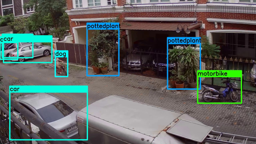

In [ ]:
from fastdownload import download_url
dest = 'mv.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  259M    0  1177    0     0   1777      0 42:34:16 --:--:-- 42:34:16  1777
curl: (23) Failure writing output to destination


In [ ]:
# prompt: i have uploaded zip file of dataset archive.zip how to unzip in here

!unzip archive.zip

Archive:  archive.zip
  inflating: human detection dataset/0/0.png  
  inflating: human detection dataset/0/1.png  
  inflating: human detection dataset/0/10.png  
  inflating: human detection dataset/0/100.png  
  inflating: human detection dataset/0/101.png  
  inflating: human detection dataset/0/102.png  
  inflating: human detection dataset/0/103.png  
  inflating: human detection dataset/0/104.png  
  inflating: human detection dataset/0/105.png  
  inflating: human detection dataset/0/106.png  
  inflating: human detection dataset/0/107.png  
  inflating: human detection dataset/0/108.png  
  inflating: human detection dataset/0/109.png  
  inflating: human detection dataset/0/11.png  
  inflating: human detection dataset/0/110.png  
  inflating: human detection dataset/0/111.png  
  inflating: human detection dataset/0/112.png  
  inflating: human detection dataset/0/113.png  
  inflating: human detection dataset/0/114.png  
  inflating: human detection dataset/0/115.png  
  in

Now let's do the same with "car photos":

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "Military Vehicle" and "car" photos, and save each group of photos to a different folder:

In [ ]:
searches = 'Military Vehicle','car'
path = Path('mv_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


In [ ]:
path = Path('/content/human detection dataset')

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

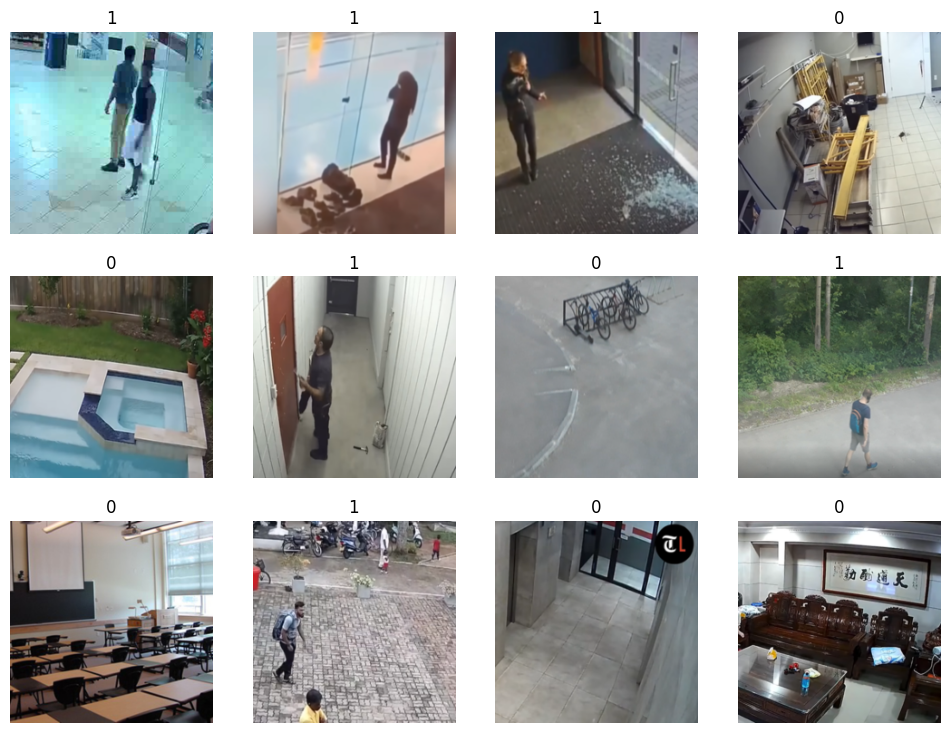

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files,

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

In [ ]:
import timm
from timm.models.helpers import group_modules
from fastai.vision.all import *

In [ ]:


arch = "vit_small_patch16_224"
m = timm.create_model(arch)
modules_names = group_modules(m, m.group_matcher(coarse=True))



In [ ]:
timm.list_models("*vit*")

In [ ]:
learn = vision_learner(dls,resnet24, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
learn = vision_learner(dls,  'vit_base_patch16_224', metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.679097,0.191525,0.059783,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.315538,0.140751,0.038043,00:27
1,0.218799,0.088643,0.038043,00:28
2,0.147828,0.099978,0.043478,00:28


Let's see what our model thinks about that bird we downloaded at the start:

In [ ]:
is_hm,_,probs = learn.predict(PILImage.create('nhm.jpg'))
print(f"This is a: {is_hm}.")
if is_hm == 1:
    print("person")
else:
    print("not person")
print(f"Probability it's a Person: {probs[1]:.4f}")

This is a: 0.
not person
Probability it's a Person: 0.0000
